In [1]:
# Import the dependancies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# Read the data

data = pd.read_csv('/home/ali/Cellula/EDA/first inten project.csv')

In [3]:
# Printing the first 5 rows of the data

data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
# Type of meals and type of rooms

print(data['type of meal'].value_counts())
print(data['room type'].value_counts())

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


Booking_ID: is the ID number for each reservation.

Number of adults: is the number of adults for each reservation.

Number of children: is the number of children for each reservation.

Number of weekend nights: is the number of weekend nights for each reservation.

Number of week nights: is the number of week nights for each reservation.

Type of meal: is the type of meal for each reservation we have four options (Not selected - Meal plan 1 - Meal plan 2 - Meal plan 3).

Car parking space: Did the client book a parking space or not.

Room type: The type of room reserved we have seven type of rooms (Room_Type 1 - Room_Type 2 - Room_Type 3 - Room_Type 4 - Room_Type 5 - Room_Type 6 - Room_Type 7).	

Lead time: is the time between a guest making their booking and arriving at the hotel for their stay (in days).

Market segment type: How did the customer make their booking. 

Repeated: Is it the customer's first time or not. 

P-C : Number of previous cancellations.

P-not-C : Number of times the customer didnot cancel his reservation. 

Average price: Average price for customer order.

Special requests: how many special request did the customer ask for.

Date of reservation: When the customer made his reservation.

Booking status: whether the booking was canceled or not.

In [5]:
# Data overall analysis

data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
# Checking if any data is missing

print(data.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [8]:
# dropping the Booking_ID column as it is a costing feature

data.drop(columns = ['Booking_ID'], axis = 1, inplace = True)

In [9]:
# Checking for duplicate data

sum(data.duplicated())

10276

In [10]:
# Droping duplicate data

data.drop_duplicates(inplace = True)

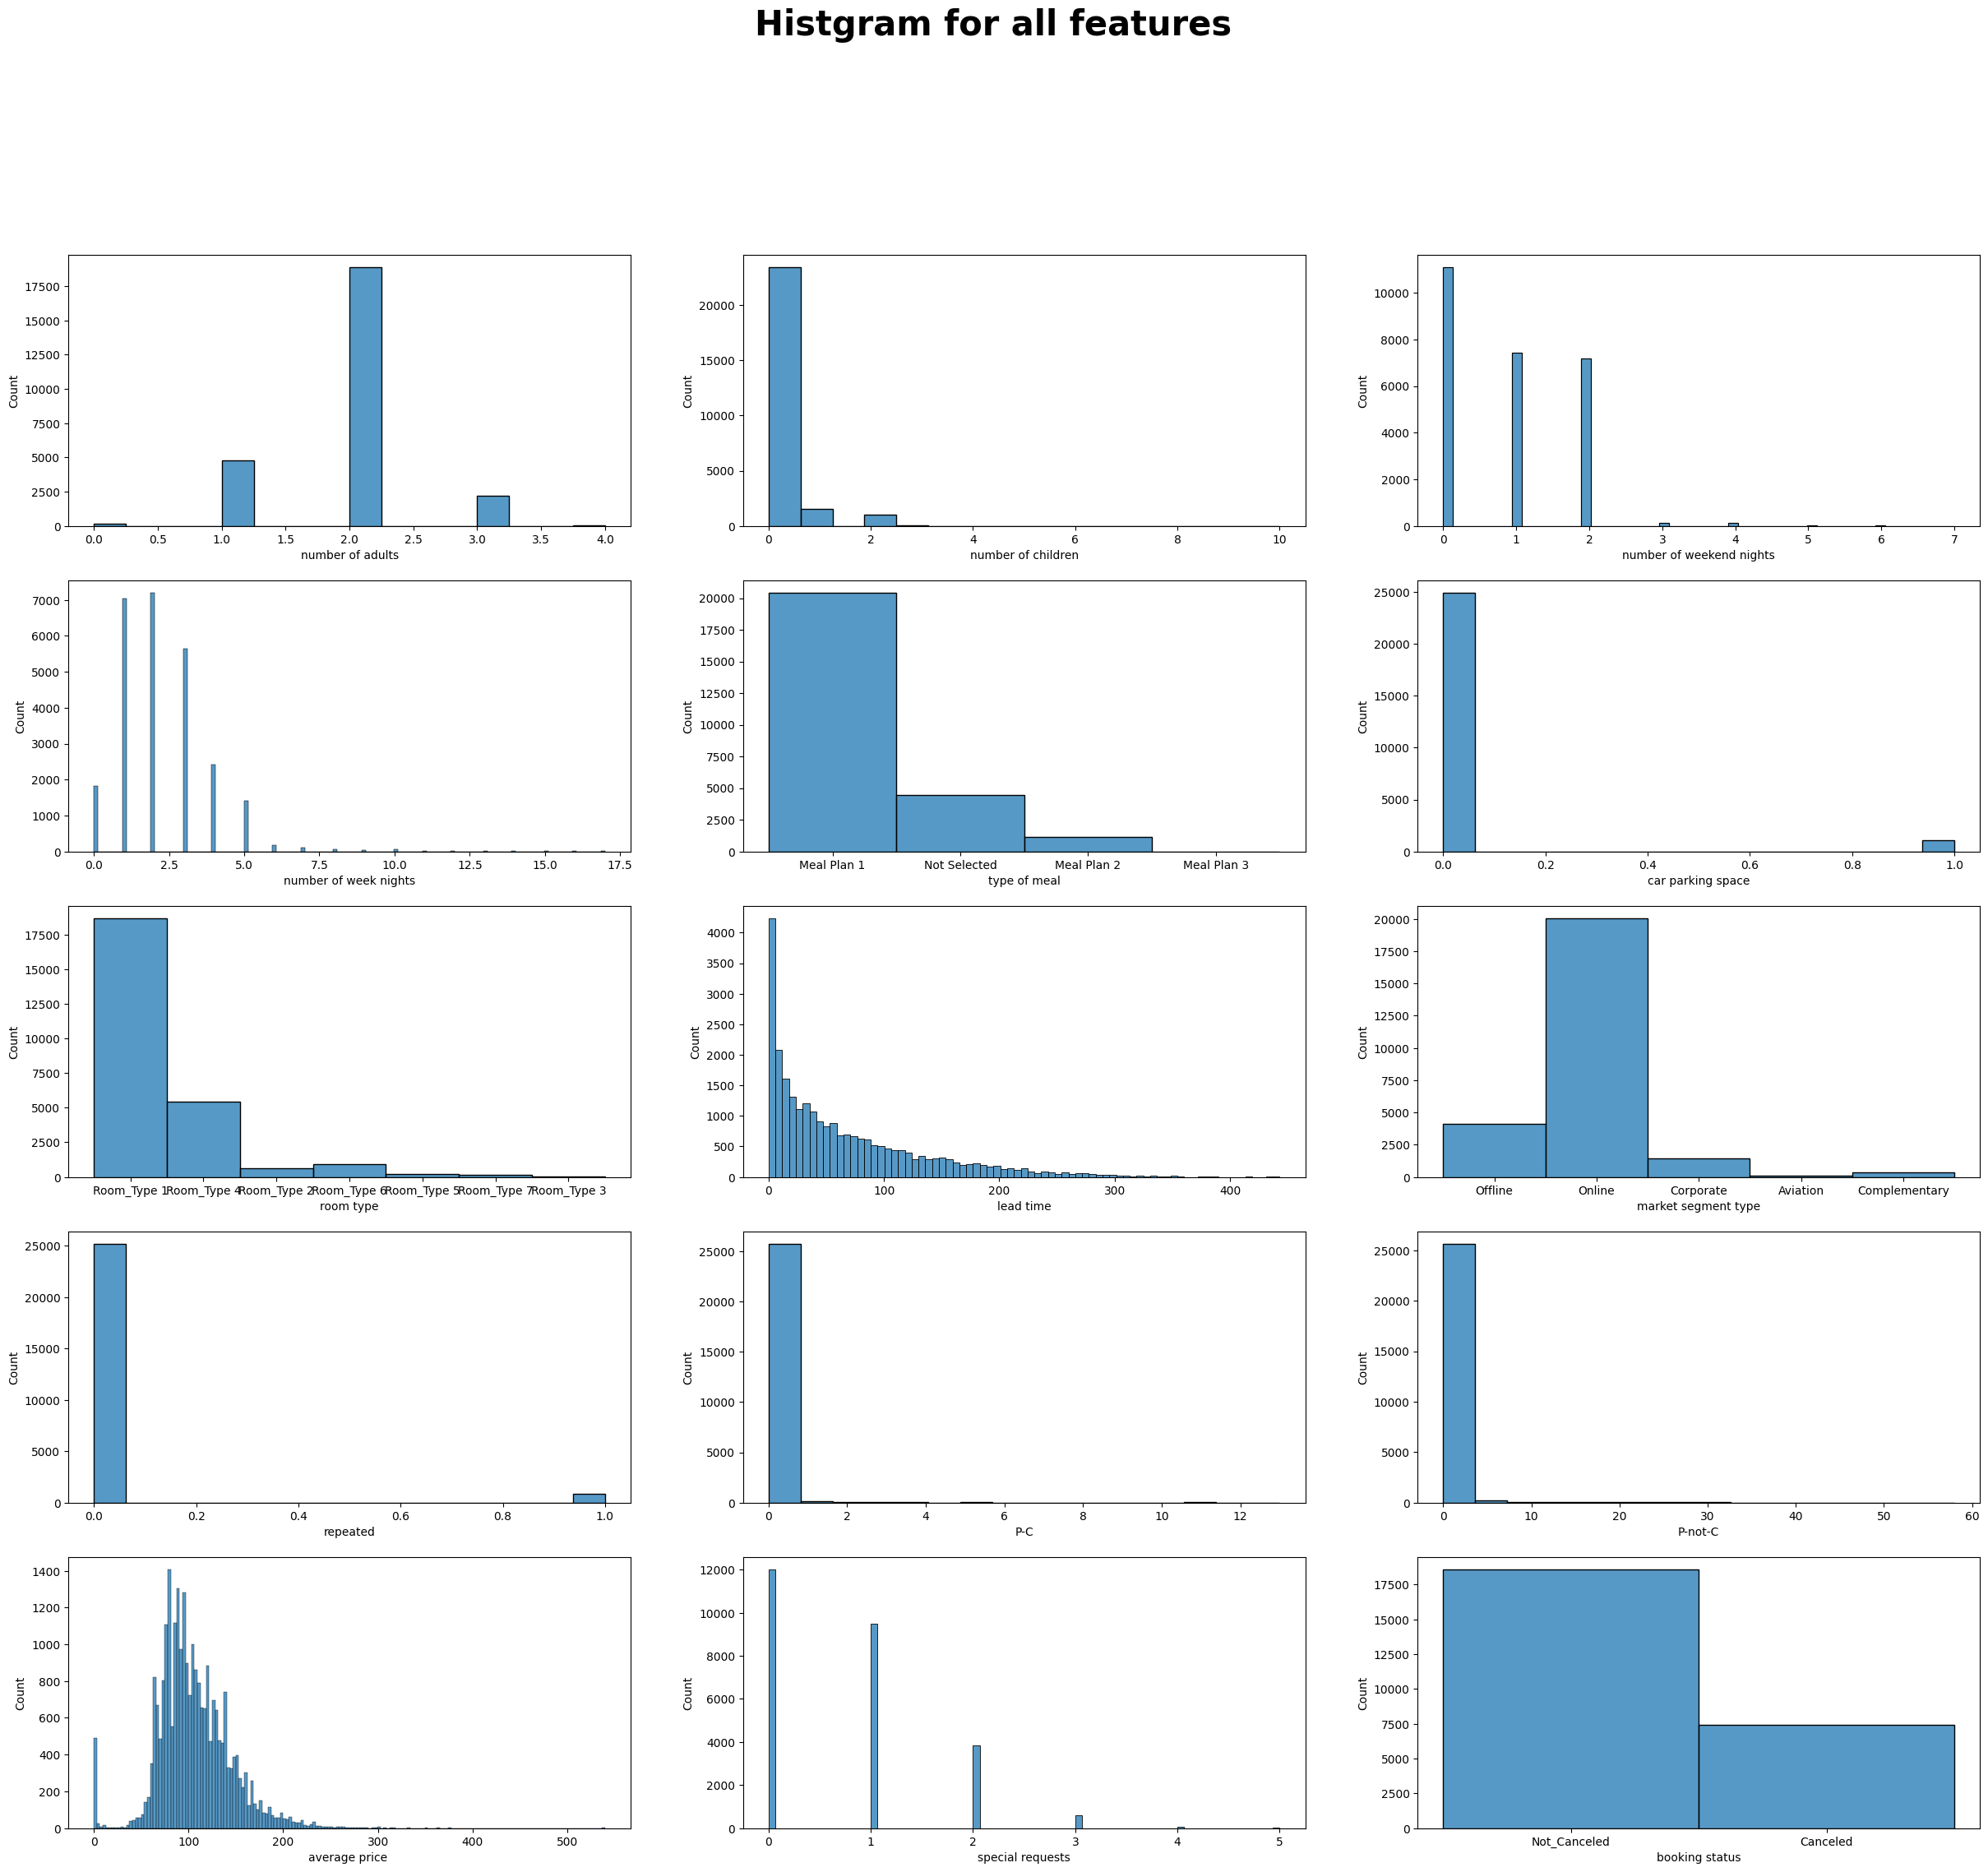

In [11]:
# Plotting histgram for all features

features = ['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests','booking status']
counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for all features",fontweight="bold", fontsize=30)
for feature in features:
    counter = counter + 1
    plt.subplot(6,3,counter)
    sns.histplot(data[feature])


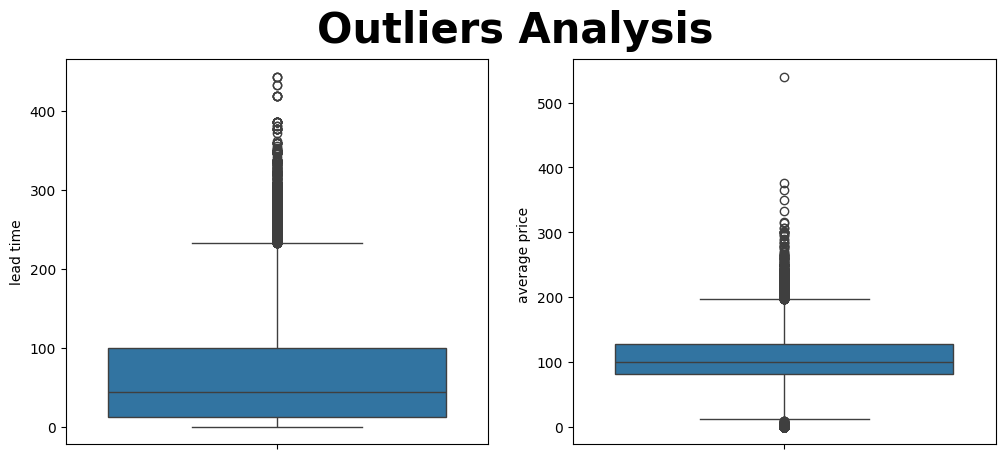

In [12]:
# Plotting boxplot for certian features

features = ['lead time', 'average price ']
counter = 0

plt.figure(figsize = (12, 5))
plt.suptitle("Outliers Analysis",fontweight="bold", fontsize=30)

for feature in features:
    counter = counter + 1
    plt.subplot(1,2,counter)
    sns.boxplot(data[feature])




In [13]:
# Fucntion to remove outliers

def remove_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for the data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return filtered_df

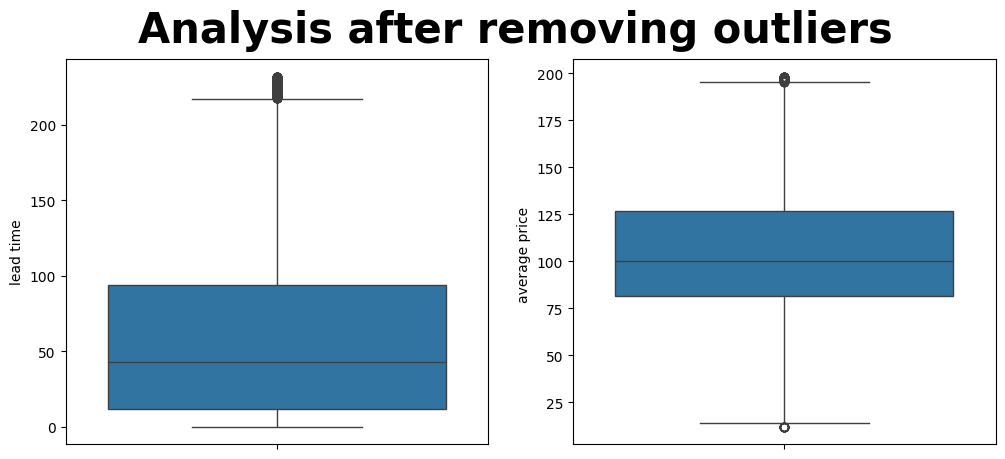

In [14]:
# Remove oultiers and plotting features after removing oultiers

features = ['lead time', 'average price ']

for feature in features:
    data = remove_outliers(data, feature)

counter = 0

plt.figure(figsize = (12, 5))
plt.suptitle("Analysis after removing outliers",fontweight="bold", fontsize=30)

for feature in features:
    counter = counter + 1
    plt.subplot(1,2,counter)
    sns.boxplot(data[feature])    


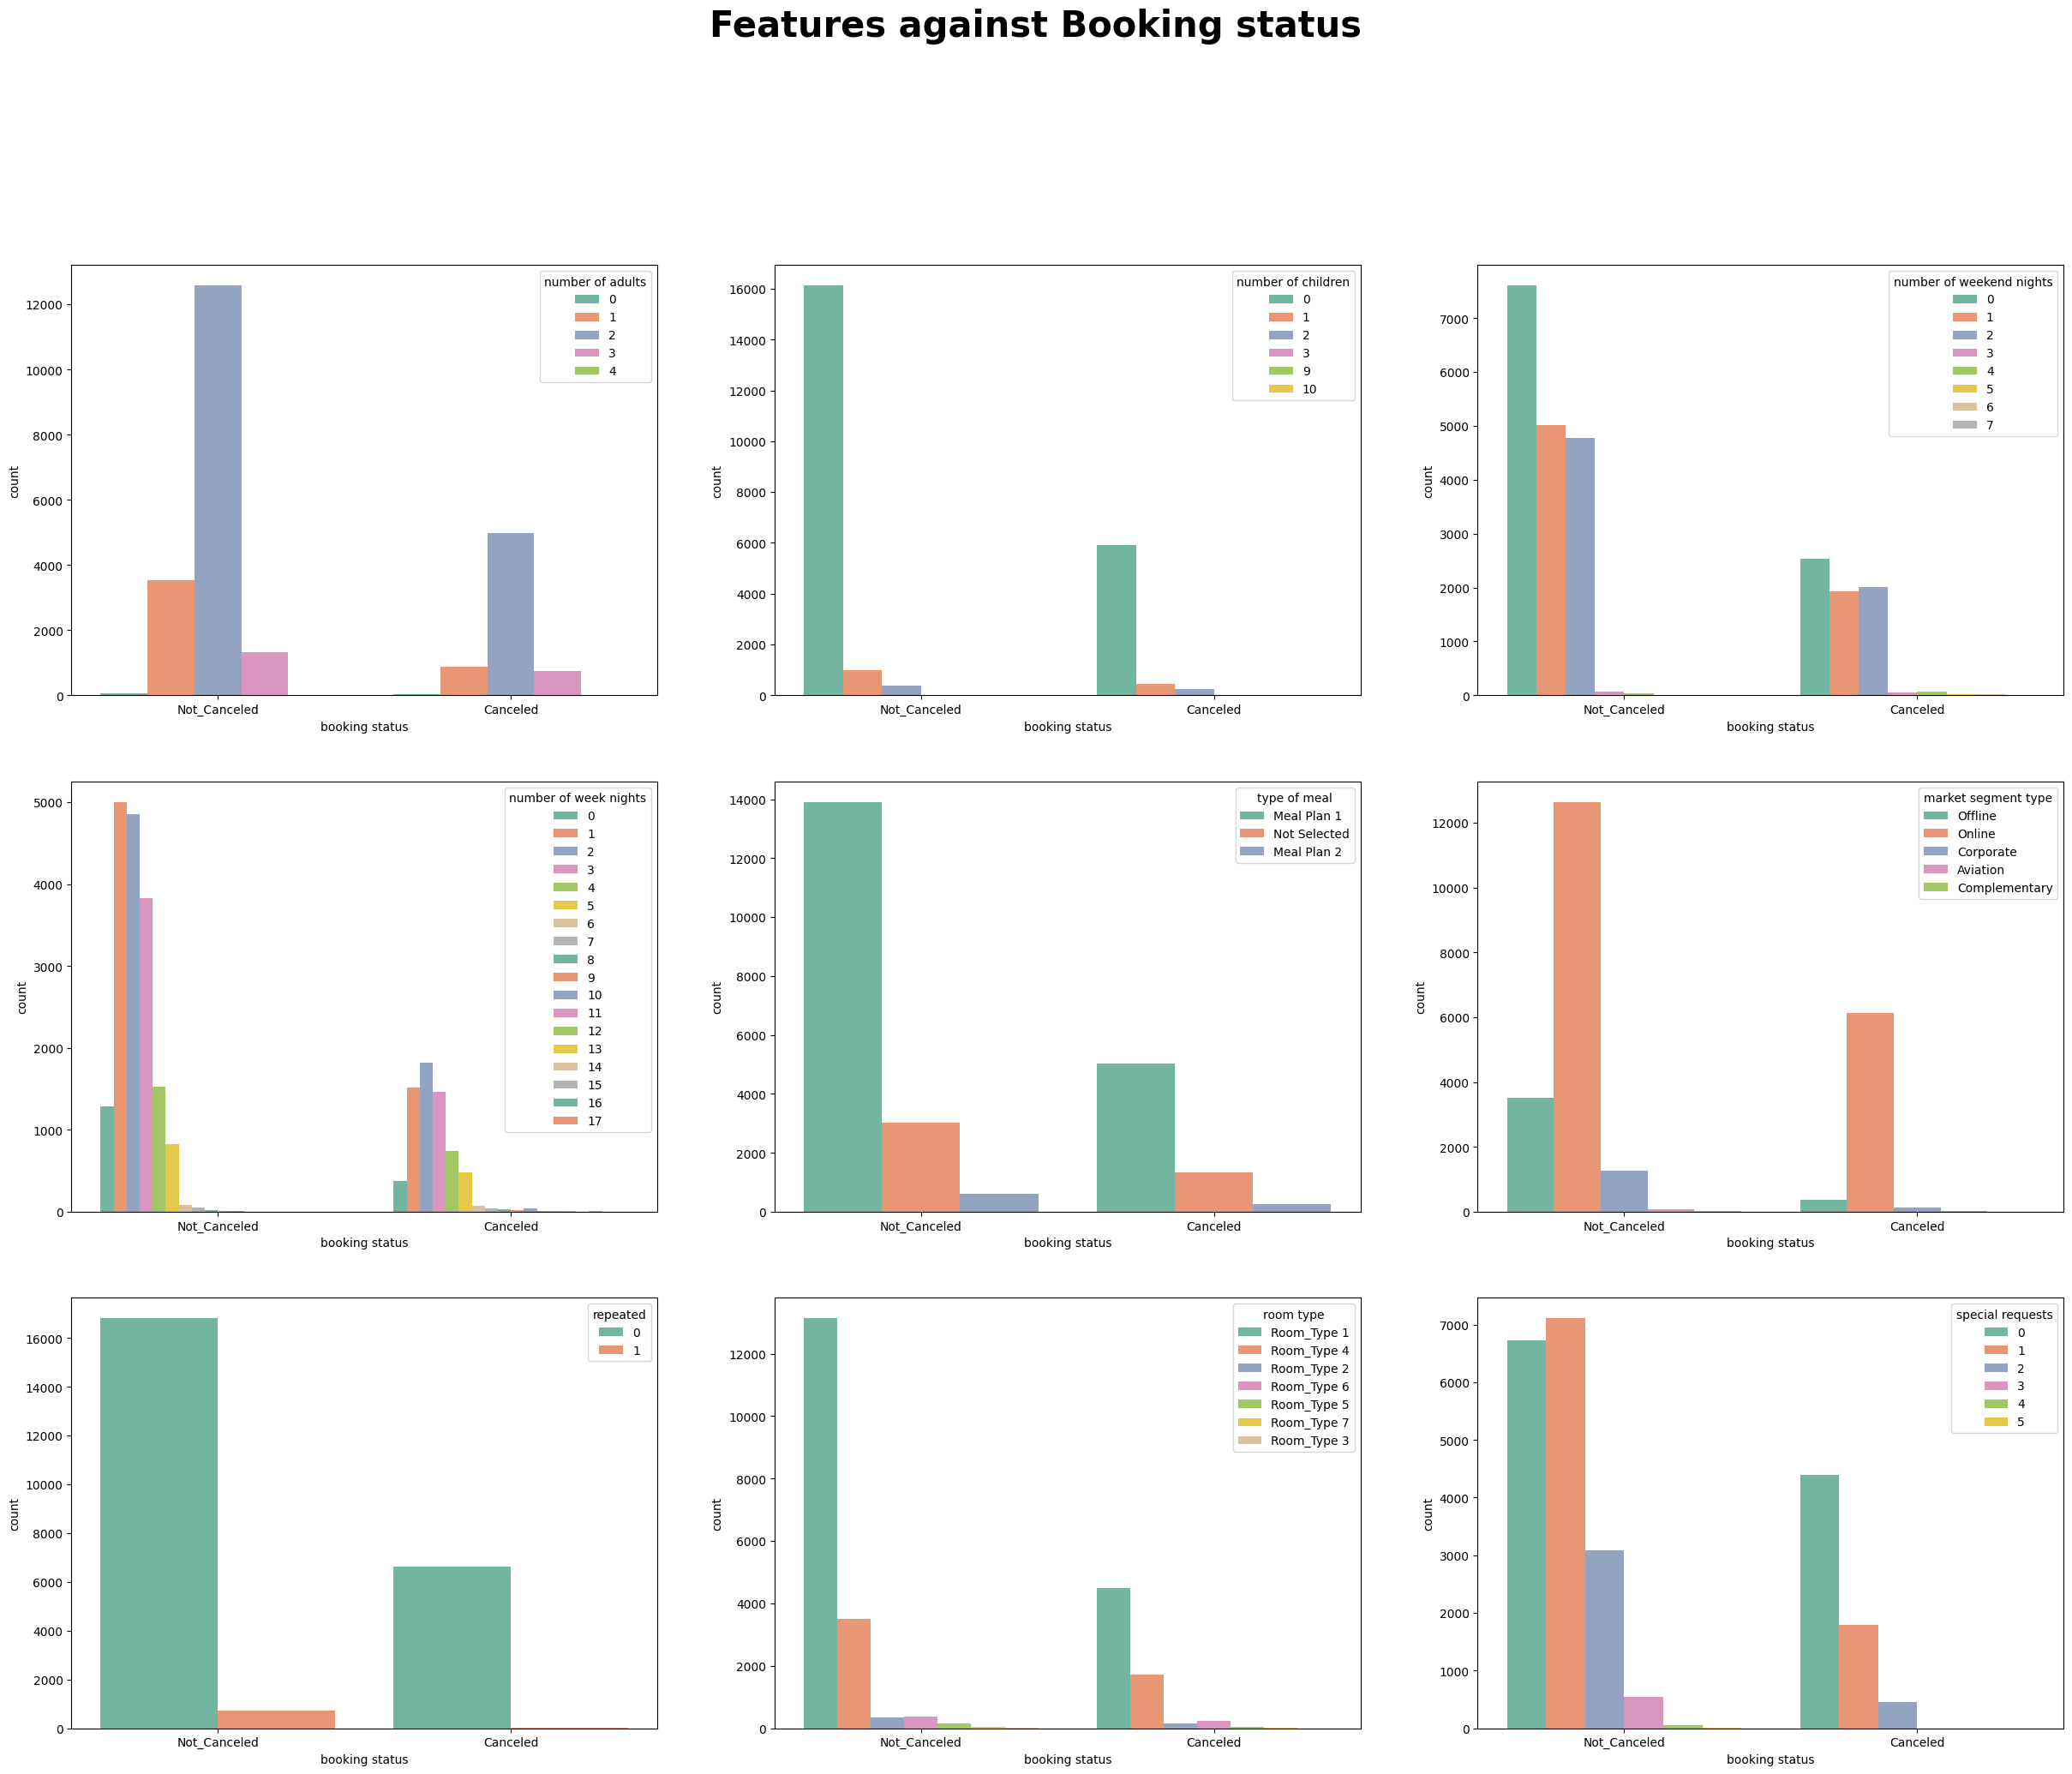

In [15]:
# Plotting features against booking_status 

features = ['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal',
       'market segment type', 'repeated', 'room type',
       'special requests']
counter = 0
plt.figure(figsize = (30, 30))
plt.suptitle("Features against Booking status",fontweight="bold", fontsize=30)

for feature in features:
    counter = counter + 1
    plt.subplot(4,3,counter)
    sns.countplot(x = 'booking status', hue = feature, palette = 'Set2', data = data)